In [1]:
import pandas as pd
import seaborn as sns

import spacy

In [2]:
from tqdm import tqdm

In [3]:
from ast import literal_eval

In [4]:
from collections import Counter

In [5]:
tqdm.pandas()

In [6]:
tcc = pd.read_csv("data/MUSIC4ALL/processed/tcc_music4all.csv", index_col=0)

In [7]:
tcc.head()

,lyrics,artist,song,album_name,genres,spotify_id,popularity,danceability,energy,key,...,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,time_signature,explicit,nb_genres,year
12,"De tanto me perder, de andar sem sono\nPor ess...",Adriana Calcanhotto,Um Dia Desses,Maré,['mpb'],30Iofj66ashW2QYbROuIC2,24,0.724,0.339,0,...,151013,0.86800,0.000001,0.1130,-12.043,0.0333,4,0,1,2008
16,No meio dessa confusão\nCê me deixou na mão\nC...,UM44K,Nossa música,Nossa música,"['pop', 'rap']",4hpcc2wq84pilUgDbIPkDN,53,0.592,0.387,2,...,239643,0.85300,0.000000,0.1070,-9.567,0.0407,4,0,2,2018
18,Radio bemba 00.0 Super Sónica\nAtento\nO bixo ...,Manu Chao,Bixo,Próxima Estación: Esperanza,"['latin', 'reggae', 'world']",3JJIdDXjN8oH6ZfPv3pApB,42,0.658,0.452,5,...,112040,0.76200,0.000000,0.5060,-9.929,0.1530,4,0,3,2001
19,Gostei da sua ideia\nEntrei na sua selva\nVocê...,Selvagens à Procura de Lei,Enquanto Eu Passar Na Sua Rua,Selvagens à Procura de Lei,"['indie rock', 'rock']",0BMowyr7gejwveFKRkhj0l,44,0.526,0.771,6,...,203987,0.12800,0.000006,0.1670,-5.507,0.0325,4,0,2,2013
47,"Já tive mulheres (salve Martinho), de todos os...",Motirô,Senhorita,Um Passo à Frente,['hip hop'],5se489TZrnQLUXZq8vARkY,13,0.844,0.591,11,...,255987,0.00618,0.000000,0.0262,-5.830,0.3000,4,0,1,2006


In [8]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 12 to 109242
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lyrics            6513 non-null   object 
 1   artist            6513 non-null   object 
 2   song              6513 non-null   object 
 3   album_name        6513 non-null   object 
 4   genres            6513 non-null   object 
 5   spotify_id        6513 non-null   object 
 6   popularity        6513 non-null   int64  
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   key               6513 non-null   int64  
 10  mode              6513 non-null   int64  
 11  valence           6513 non-null   float64
 12  tempo             6513 non-null   float64
 13  duration_ms       6513 non-null   int64  
 14  acousticness      6513 non-null   float64
 15  instrumentalness  6513 non-null   float64
 16  liveness          6513 non-null   float

In [9]:
tcc.genres = tcc.genres.progress_apply(literal_eval)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6513/6513 [00:00<00:00, 55924.63it/s]


In [10]:
tcc.describe()

,popularity,danceability,energy,key,mode,valence,tempo,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,time_signature,explicit,nb_genres,year
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000
mean,27.255028,0.580778,0.625575,5.476739,0.621373,0.561548,121.765231,218427.417933,0.359305,0.032699,0.250550,-8.313029,0.074941,3.930754,0.029326,2.017657,2005.746200
std,17.780783,0.156392,0.225432,3.551151,0.485082,0.247725,28.681485,63009.999526,0.300103,0.128242,0.235294,3.679590,0.080983,0.347810,0.168732,1.080666,13.609447
min,0.000000,0.064500,0.000042,0.000000,0.000000,0.035100,49.286000,32152.000000,0.000003,0.000000,0.019700,-31.624000,0.022400,1.000000,0.000000,1.000000,1957.000000
25%,13.000000,0.476000,0.469000,2.000000,0.000000,0.362000,98.019000,180040.000000,0.072600,0.000000,0.102000,-10.313000,0.033600,4.000000,0.000000,1.000000,2001.000000
50%,28.000000,0.587000,0.646000,6.000000,1.000000,0.569000,120.168000,212267.000000,0.305000,0.000009,0.143000,-7.749000,0.044600,4.000000,0.000000,2.000000,2011.000000
75%,41.000000,0.694000,0.811000,9.000000,1.000000,0.768000,140.007000,248128.000000,0.610000,0.001050,0.314000,-5.739000,0.075400,4.000000,0.000000,3.000000,2016.000000
max,72.000000,0.974000,1.000000,11.000000,1.000000,0.989000,207.909000,868813.000000,0.995000,0.970000,0.992000,0.801000,0.942000,5.000000,1.000000,7.000000,2022.000000


In [11]:
tcc["explicit_cat"] = tcc.explicit.astype("category")

# Artist

In [53]:
tcc.artist = tcc.artist.str.strip().str.lower()

In [25]:
len(tcc.artist.unique())

1052

In [28]:
artist_count = tcc.artist.value_counts()
artist_count

chico buarque               102
gal costa                    87
legião urbana                72
elis regina                  71
gilberto gil                 69
                           ... 
hot play                      1
bonde do tigrão               1
filarmônica de pasárgada      1
angra                         1
yonlu                         1
Name: artist, Length: 1052, dtype: int64

<AxesSubplot:>

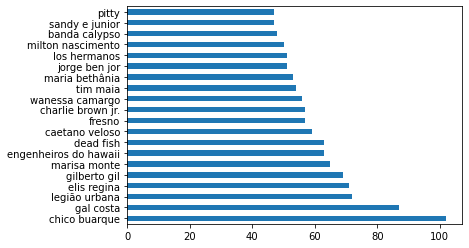

In [38]:
top20_artist = artist_count[:20]
top20_artist.plot(kind='barh');

In [40]:
bottom20_artist = artist_count[-20:]
bottom20_artist

gabriel valim               1
cavaleiros do forró         1
primeiramente               1
tá na mente                 1
bárbara eugênia             1
wyclef jean                 1
martte                      1
marina                      1
danna lisboa                1
luan estilizado             1
rzo                         1
frankito lopes              1
márcio greyck               1
wanderley andrade           1
banda torpedo               1
hot play                    1
bonde do tigrão             1
filarmônica de pasárgada    1
angra                       1
yonlu                       1
Name: artist, dtype: int64

In [64]:
unique_explicit_artist = tcc[tcc.explicit==1].artist.drop_duplicates().to_frame()
unique_explicit_artist["explicit_cat"] = "1"
unique_non_explicit_artist = tcc[tcc.explicit==0].artist.drop_duplicates().to_frame()
unique_non_explicit_artist["explicit_cat"] = "0"

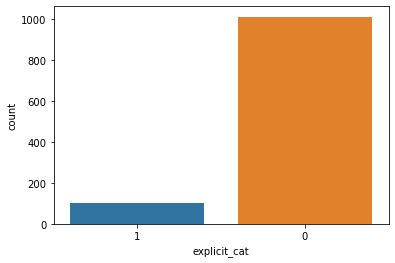

In [65]:
unique_artist_count = pd.concat([unique_explicit_artist, unique_non_explicit_artist])
sns.countplot(x="explicit_cat", data=unique_artist_count);

In [66]:
len(unique_artist_count[unique_artist_count.artist.duplicated()].artist)

59

# Album Name

In [71]:
tcc.album_name = tcc.album_name.str.strip().str.lower()

In [72]:
album_count = tcc.groupby(["artist", "album_name"]).size().sort_values()

In [73]:
len(album_count)

2964

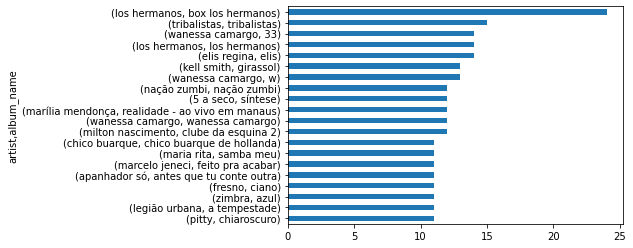

In [74]:
top20_album = album_count[-20:]
top20_album.plot(kind='barh');

In [79]:
unique_explicit_album = tcc[tcc.explicit==1].drop_duplicates(subset=["artist", "album_name"])
unique_explicit_album["explicit_cat"] = "1"
unique_non_explicit_album = tcc[tcc.explicit==0].drop_duplicates(subset=["artist", "album_name"])
unique_non_explicit_album["explicit_cat"] = "0"

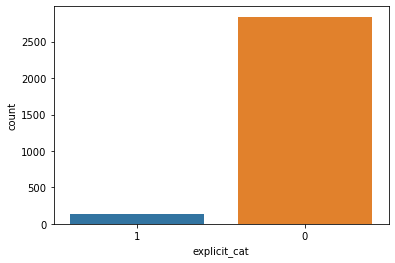

In [80]:
unique_album_count = pd.concat([unique_explicit_album, unique_non_explicit_album])[["artist", "album_name", "explicit_cat"]]
sns.countplot(x="explicit_cat", data=unique_album_count);

In [82]:
len(unique_album_count.drop(columns="explicit_cat")[unique_album_count.duplicated()])

0

# Song

In [12]:
nlp = spacy.load('pt_core_news_md')
nlp.Defaults.stop_words |= {'pra'}

In [13]:
def get_lemmas(text):
    return [i.lemma_ for i in nlp(text.lower()) if not i.is_stop and i.is_alpha]

In [14]:
tcc["song_lemmas"] = tcc.song.progress_apply(get_lemmas)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6513/6513 [00:29<00:00, 217.44it/s]


In [15]:
tcc["song_nb_words"] = tcc.song_lemmas.apply(len)

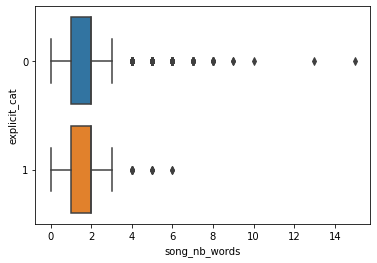

In [16]:
sns.boxplot(x="song_nb_words", y="explicit_cat", data=tcc);

In [17]:
vocab = []
vocab_explicit = []
vocab_non_explicit= []

for i, row in tqdm(tcc.iterrows()):

    if row.explicit_cat == 0:
        vocab_non_explicit.extend(row.song_lemmas)
    else:
        vocab_explicit.extend(row.song_lemmas)
        
    vocab.extend(row.song_lemmas)

6513it [00:00, 10935.36it/s]


In [18]:
len(set(vocab))

4125

In [19]:
len(set(vocab_explicit))

289

In [20]:
len(set(vocab_non_explicit))

3990

In [21]:
vocab_count = pd.DataFrame(columns=["explicit_cat", "vocab"], data=[[1, len(set(vocab_explicit))],
                                                                    [0, len(set(vocab_non_explicit))]])
vocab_count

,explicit_cat,vocab
0,1,289
1,0,3990


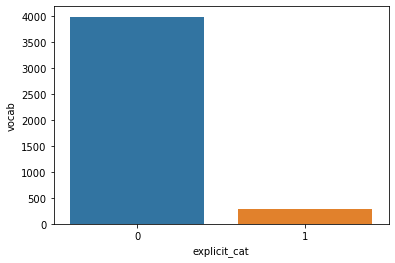

In [22]:
sns.barplot(x="explicit_cat", y="vocab", data=vocab_count);

In [23]:
explicit_song_count = Counter(vocab_explicit)
non_explicit_song_count = Counter(vocab_non_explicit)

<AxesSubplot:ylabel='palavra'>

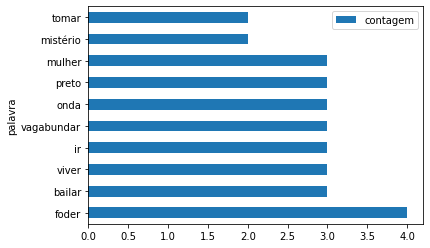

In [26]:
most_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=explicit_song_count.most_common(10))
most_explicit = most_explicit.set_index("palavra")
most_explicit.plot(kind='barh');

<AxesSubplot:ylabel='palavra'>

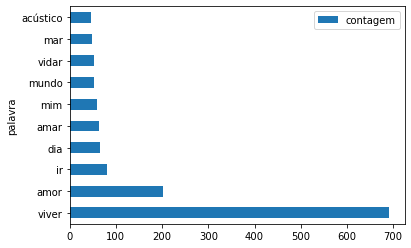

In [27]:
most_non_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=non_explicit_song_count.most_common(10))
most_non_explicit = most_non_explicit.set_index("palavra")
most_non_explicit.plot(kind='barh');

# Lyrics

In [28]:
tcc["lyrics_lemmas"] = tcc.lyrics.progress_apply(get_lemmas)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6513/6513 [02:50<00:00, 38.26it/s]


In [29]:
tcc["lyrics_nb_words"] = tcc.lyrics_lemmas.apply(len)

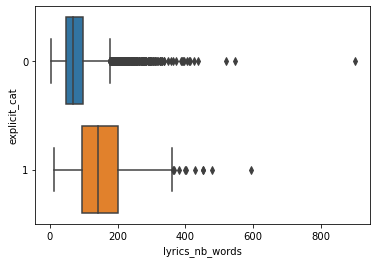

In [30]:
sns.boxplot(x="lyrics_nb_words", y="explicit_cat", data=tcc);

In [31]:
vocab = []
vocab_explicit = []
vocab_non_explicit= []

for i, row in tqdm(tcc.iterrows()):

    if row.explicit_cat == 0:
        vocab_non_explicit.extend(row.lyrics_lemmas)
    else:
        vocab_explicit.extend(row.lyrics_lemmas)
        
    vocab.extend(row.lyrics_lemmas)

6513it [00:00, 10497.11it/s]


In [32]:
len(set(vocab))

21267

In [33]:
len(set(vocab_explicit))

5566

In [34]:
len(set(vocab_non_explicit))

20028

In [35]:
vocab_count = pd.DataFrame(columns=["explicit_cat", "vocab"], data=[[1, len(set(vocab_explicit))],
                                                                    [0, len(set(vocab_non_explicit))]])
vocab_count

,explicit_cat,vocab
0,1,5566
1,0,20028


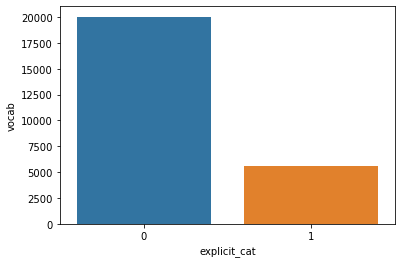

In [36]:
sns.barplot(x="explicit_cat", y="vocab", data=vocab_count);

In [37]:
explicit_song_count = Counter(vocab_explicit)
non_explicit_song_count = Counter(vocab_non_explicit)

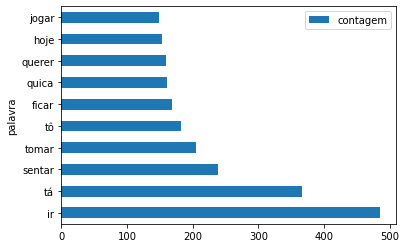

In [38]:
most_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=explicit_song_count.most_common(10))
most_explicit = most_explicit.set_index("palavra")
most_explicit.plot(kind='barh');

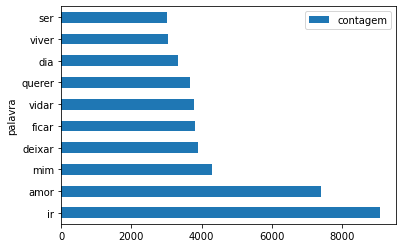

In [39]:
most_non_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=non_explicit_song_count.most_common(10))
most_non_explicit = most_non_explicit.set_index("palavra")
most_non_explicit.plot(kind='barh');

# Genres

In [40]:
genres = []
genres_explicit = []
genres_non_explicit= []

for i, row in tqdm(tcc.iterrows()):

    if row.explicit_cat == 0:
        genres_non_explicit.extend(row.genres)
    else:
        genres_explicit.extend(row.genres)
        
    genres.extend(row.genres)

6513it [00:00, 10572.61it/s]


In [41]:
len(set(genres))

242

In [42]:
len(set(genres_explicit))

49

In [43]:
len(set(genres_non_explicit))

239

In [44]:
genres_count = pd.DataFrame(columns=["explicit_cat", "genres"], data=[[1, len(set(genres_explicit))],
                                                                    [0, len(set(genres_non_explicit))]])
genres_count

,explicit_cat,genres
0,1,49
1,0,239


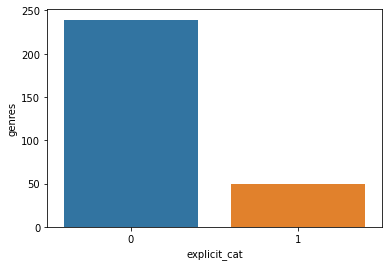

In [45]:
sns.barplot(x="explicit_cat", y="genres", data=genres_count);

In [46]:
explicit_genre_count = Counter(genres_explicit)
non_explicit_genre_count = Counter(genres_non_explicit)

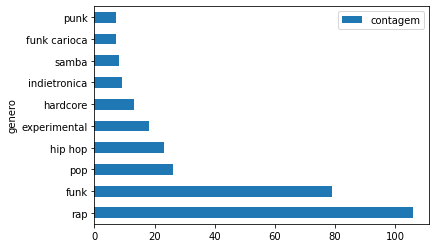

In [48]:
most_explicit = pd.DataFrame(columns=["genero", "contagem"], data=explicit_genre_count.most_common(10))
most_explicit = most_explicit.set_index("genero")
most_explicit.plot(kind='barh');

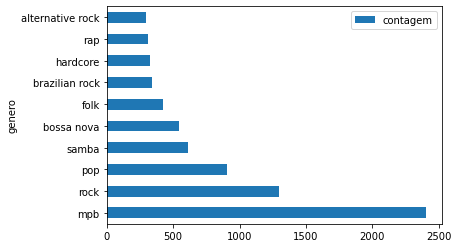

In [49]:
most_non_explicit = pd.DataFrame(columns=["genero", "contagem"], data=non_explicit_genre_count.most_common(10))
most_non_explicit = most_non_explicit.set_index("genero")
most_non_explicit.plot(kind='barh');

# Explicit

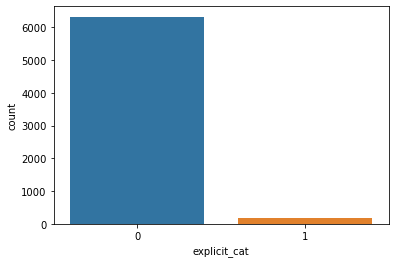

In [68]:
sns.countplot(x='explicit_cat', data=tcc);

In [92]:
explicit_years = tcc.sort_values('year')[['explicit_cat', 'year']]
explicit_years_agg = explicit_years.groupby(["year", "explicit_cat"]).size()
explicit_years_agg = explicit_years_agg.reset_index()
explicit_years_agg.columns = ['year', 'explicit_cat', 'count']
explicit_years_agg

,year,explicit_cat,count
0,1957,0,2
1,1957,1,0
2,1958,0,1
3,1958,1,0
4,1963,0,7
...,...,...,...
119,2020,1,0
120,2021,0,2
121,2021,1,0
122,2022,0,4


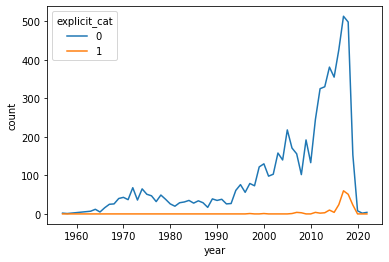

In [94]:
sns.lineplot(x='year', y='count', hue='explicit_cat', data=explicit_years_agg);